<a href="https://colab.research.google.com/github/ArthurBoschet/PPIdiscovery/blob/main/string_dataset_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook setup

## Install

In [1]:
!pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=aa0ca15053413a8ab32fc56bf81d6705bdbfe67c9ca7cf2b8e0000dc4b8c6677
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


## Git Repository

In [54]:
!git clone https://github.com/ArthurBoschet/PPIdiscovery.git

Cloning into 'PPIdiscovery'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


### Pull New Version

In [58]:
cd PPIdiscovery

/content/PPIdiscovery


In [59]:
!git pull


Already up to date.


In [60]:
cd ..

/content


In [61]:
ls

drive/  PPIdiscovery/  sample_data/


## Imports

In [64]:
#utilities
from tqdm import tqdm

#scientific computation
import numpy as np

#dataframes
import pandas as pd

#networks
import networkx as nx

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#access google drive
from google.colab import drive
drive.mount('/content/drive')

#own files
from PPIdiscovery.embeddings import embedding_func, grid_search

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Directories

In [68]:
species = "human"
glob_dir = "drive/MyDrive/protein_network/string/"+species
data = glob_dir + '/data'
embeddings = glob_dir + '/embeddings'

In [4]:
ls drive/MyDrive/protein_network/string/human

 9606.protein.info.v11.5.txt
 9606.protein.links.detailed.v11.5.txt
'human_string_dataset Full Network default edge.csv'
'human_string_dataset Full Network default node.csv'


# Create Networks

## Sequence Similarity Network

### Create Network

In [66]:
SSN_df = pd.read_csv(data +"/human_string_dataset Full Network default edge.csv" )

In [67]:
node_info = pd.read_csv(data +"/human_string_dataset Full Network default node.csv")

In [7]:
SSN_df

,%id,alignment_len,alignment_score,interaction,name,selected,shared interaction,shared name
0,62.99,4469,1708.0,NaN,"zz13346,zzz2540",False,NaN,"zz13346,zzz2540"
1,61.37,4615,1706.0,NaN,"zzz3015,zzz7906",False,NaN,"zzz3015,zzz7906"
2,55.38,5318,1682.0,NaN,"zzz5832,zzz9950",False,NaN,"zzz5832,zzz9950"
3,65.62,4296,1679.0,NaN,"zz10152,zzz9729",False,NaN,"zz10152,zzz9729"
4,59.77,4621,1612.0,NaN,"zz13311,zzz1297",False,NaN,"zz13311,zzz1297"
...,...,...,...,...,...,...,...,...
548147,66.67,24,8.0,NaN,"zz16815,zzz7555",False,NaN,"zz16815,zzz7555"
548148,86.67,60,8.0,NaN,"zzz8064,zzz8078",False,NaN,"zzz8064,zzz8078"
548149,86.67,60,8.0,NaN,"zz18610,zzz8064",False,NaN,"zz18610,zzz8064"
548150,47.22,36,7.0,NaN,"zz12165,zz13119",False,NaN,"zz12165,zz13119"


In [8]:
node_info

,Description,name,selected,Sequence,Sequence Length,Sequence Source,shared name
0,9606.ENSP00000354794,zz10000,False,MSRRKQAKPRSLKDPNCKLEDKTEDGEALDCKKRPEDGEELEDEAV...,1311,USER,zz10000
1,9606.ENSP00000354800,zz10001,False,MMASERNQSSTPTFILLGFSEYPEIQVPLFLVFLFVYTVTVVGNLG...,314,USER,zz10001
2,9606.ENSP00000354812,zz10002,False,MAERGRKRPCGPGEHGQRIEWRKWKQQKKEEKKKWKDLKLMKKLER...,376,USER,zz10002
3,9606.ENSP00000354813,zz10003,False,MTMHTTMTTLTLTSLIPPILTTLVNPNKKNSYPHYVKSIVASTFII...,603,USER,zz10003
4,9606.ENSP00000354822,zz10004,False,MEGDFSVCRNCKRHVVSANFTLHEAYCLRFLVLCPECEEPVPKETM...,301,USER,zz10004
...,...,...,...,...,...,...,...
19561,9606.ENSP00000002165,zzzzzz5,False,MRPQELPRLAFPLLLLLLLLLPPPPCPAHSATRFDPTWESLDARQL...,467,USER,zzzzzz5
19562,9606.ENSP00000002596,zzzzzz6,False,MAALLLGAVLLVAQPQLVPSRPAELGQQELLRKAGTLQDDVRDGVA...,307,USER,zzzzzz6
19563,9606.ENSP00000002829,zzzzzz7,False,MLVAGLLLWASLLTGAWPSFPTQDHLPATPRVRLSFKELKATGTAH...,785,USER,zzzzzz7
19564,9606.ENSP00000003084,zzzzzz8,False,MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSA...,1480,USER,zzzzzz8


In [30]:
ssn_edge_list = [(edge.split(',')[0], edge.split(',')[1], {'weight':id}) for edge, id in zip(SSN_df['name'], SSN_df['%id'])]

In [31]:
G_ssn = nx.Graph()
G_ssn.add_edges_from(ssn_edge_list)

In [32]:
print(f"Initial number of edges is {len(G_ssn.edges)} and number of nodes is {len(G_ssn.nodes)}")

Initial number of edges is 548152 and number of nodes is 15677


In [33]:
print(f"Initial number of connected components is {len([g for g in nx.connected_components(G_ssn)])}")

Initial number of connected components is 1752


In [34]:
l = sorted([list(sub) for sub in nx.connected_components(G_ssn)], reverse=True, key=len)

In [35]:
num_el = [len(el) for el in l]

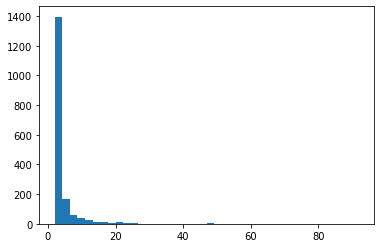

In [36]:
plt.hist(sorted(num_el, reverse=True)[2:],bins=40)
plt.show()

In [37]:
# new_edges = []
# for i in tqdm(range(len(l))):
#   j = (i+1)%len(l)
#   new_edges.append((l[i][np.random.randint(len(l[i]))], l[j][np.random.randint(len(l[j]))],{'weight': 0.1}))

In [39]:
#len(new_edges)

In [40]:
#G_ssn.add_edges_from(new_edges)

In [41]:
nodes_not_in_G_ssn = [n for n in node_info.name.values if n not in G_ssn.nodes]

In [42]:
len(nodes_not_in_G_ssn)

3889

In [43]:
G_ssn.add_nodes_from(nodes_not_in_G_ssn)

In [49]:
#nodes = list(G_ssn.nodes)
#missing_edges = [(nodes[i], nodes[j], {'weight':0.1}) for i in tqdm(range(len(nodes)-1)) for j in range(i+1, len(nodes)) if (nodes[i], nodes[j]) not in G_ssn.edges]

In [19]:
#connect_nodes = [(n,np.random.choice(G_ssn.nodes), {'weight':0.1}) for n in tqdm(node_info.name.values) if n not in G_ssn.nodes]

In [20]:
#G_ssn.add_edges_from(connect_nodes)

In [50]:
#assert nx.is_connected(G_ssn), "oops the SS network is not connected"

In [48]:
len(G_ssn.nodes)

19566

### Create Embeddings

In [71]:
parameters_ssn = {'dimensions':[512], 'walk_length':[16]}

In [70]:
embedding_ssn = lambda dimensions,walk_length: embedding_func(dimensions,walk_length, G_ssn, embeddings)

In [ ]:
grid_search(parameters_ssn, embedding_ssn)

Computing transition probabilities:   0%|          | 0/19566 [00:00<?, ?it/s]

## String Interaction Network

In [101]:
description_to_name = {k:v for k,v in zip(node_info.Description, node_info.name)}

In [18]:
string_edges = pd.read_csv(data +"/9606.protein.links.detailed.v11.5.txt", sep=' ')

In [20]:
string_edges_95 = string_edges[string_edges['combined_score'].values >= 950]

In [21]:
string_edges_95

,protein1,protein2,neighborhood,fusion,cooccurence,coexpression,experimental,database,textmining,combined_score
187,9606.ENSP00000000233,9606.ENSP00000440005,0,0,50,99,679,900,59,969
1082,9606.ENSP00000000233,9606.ENSP00000262305,0,0,0,0,879,0,686,960
1490,9606.ENSP00000000412,9606.ENSP00000349437,0,0,0,55,0,800,901,979
1750,9606.ENSP00000000412,9606.ENSP00000391826,0,0,0,0,0,0,986,986
1801,9606.ENSP00000000412,9606.ENSP00000438085,0,0,0,0,932,0,537,967
...,...,...,...,...,...,...,...,...,...,...
11938123,9606.ENSP00000485663,9606.ENSP00000472985,0,0,0,504,838,600,68,966
11938186,9606.ENSP00000485663,9606.ENSP00000436049,0,0,0,928,993,900,881,999
11938211,9606.ENSP00000485663,9606.ENSP00000248342,0,0,0,699,996,900,957,999
11938234,9606.ENSP00000485663,9606.ENSP00000220849,0,0,0,907,993,900,896,999


In [107]:
l = [description_to_name[p] in G_ssn.nodes for p in string_edges_95.protein1.values]
np.sum(l)/len(l)

0.7041093685735234

In [81]:
interactions = [(description_to_name[p1], description_to_name[p2]) for p1, p2 in zip(string_edges_95.protein1.values, string_edges_95.protein2.values)]

In [108]:
#create the interaction graph


In [110]:
G_string = nx.Graph()
G_string.add_edges_from(interactions)

In [112]:
len(G_string.nodes)

9640